## Notas de aula: Teoria de Grupos, Autor: Jonas Maziero, Departamento de Física, UFSM

In [69]:
%run /Users/jonasmaziero/Dropbox/GitHub/algebra_linear/init.ipynb

# Grupos de Lie
O grupo de Lorentz é um exemplo de grupo contínuo, cujos elementos são parametrizados por números reais (ou complexos). Grupos de Lie são grupos contínuos tais que os parâmetros que determinam o elemento composto são funções analíticas dos parâmetros que determinam os elementos sendo compostos. Nesses casos podemos descrever todo o grupo "olhando" para elementos infinitesimalmente próximos ao elemento identidade.

#### Exemplo: $SO(2)$
Os Elementos desse grupo podem ser parametrizados e escritos como segue (__exercício__):
\begin{equation}
O_{\phi} = \begin{bmatrix} \cos\phi & \sin\phi \\ -\sin\phi & \cos\phi \end{bmatrix} = \sigma_{0}\cos\phi + i\sigma_{2}\sin\phi = e^{i\sigma_{2}\phi}.
\end{equation}
Aqui é direto ver que $O_{\phi}O_{\phi'}=O_{\phi+\phi'}$ pois, pela comutatividade, $e^{i\sigma_{2}\phi}e^{i\sigma_{2}\phi'}=e^{i\sigma_{2}(\phi+\phi')}$. Claro, para rotações infinitesimais $O_{\phi\rightarrow0}\approx\sigma_{0}+i\phi\sigma_{2}$.

#### Exemplo: $SU(2)$
Qualquer matriz desse tipo pode ser escrita como
\begin{equation}
U_{\alpha,\theta,\hat{n}}=e^{i\alpha}R_{\hat{n}}(\theta),
\end{equation}
com
\begin{equation}
R_{\hat{n}}(\theta)=e^{i\hat{n}\cdot\vec{\sigma}\theta}=\sigma_{0}\cos\theta+i\hat{n}\cdot\vec{\sigma}\sin\theta.
\end{equation}

Aqui a transformação infinitesimal ($\epsilon\rightarrow 0$) fica:
\begin{equation}
R_{\hat{n}}(\epsilon) = e^{i\hat{n}\cdot\vec{\sigma}\epsilon} = \sigma_{0} + i\hat{n}\cdot\vec{\sigma}\epsilon + \mathcal{O}(\epsilon^{2}) \approx \sigma_{0} + i\hat{n}\cdot\vec{\sigma}\epsilon.
\end{equation}

## Geradores do grupo de Lie
Os exemplos acima indicam uma representação infinitesimal geral para grupos de Lie ($\epsilon\rightarrow0$):
\begin{equation}
R(\epsilon) = e^{i\epsilon S} \approx e + i\epsilon S,
\end{equation}
em que as transformações $S$ são os ditos _geradores_ do grupo de Lie.

Algumas observações (__exercício:__ verificar):
* Elemento inverso
\begin{equation}
R^{-1}(\epsilon)= e^{-i\epsilon S} \approx e - i\epsilon S.
\end{equation}

* Se $R$ é unitário, $S$ é Hermitiano:
\begin{equation}
R^{\dagger}(\epsilon)R(\epsilon) = e \approx e + i\epsilon(S-S^{\dagger}).
\end{equation}

* Se R é normal e $\det(R)=1$, então $Tr(S)=0$:
\begin{equation}
\det(R(\epsilon)) = \det(e^{i\epsilon S}) = e^{i\epsilon Tr(S)}.
\end{equation}

* Transformação finita é obtida compondo-se rotações infinitesimais ($\varepsilon=N\epsilon=\epsilon+\cdots+\epsilon$ para $N\rightarrow\infty$):
\begin{equation}
R(\varepsilon)=\lim_{N\rightarrow\infty}\left(e+i(\varepsilon/N)S\right)^{N}=e^{i\varepsilon S}.
\end{equation}

Geradores a partir das transformações finitas:
\begin{equation}
S = -i\left[\frac{dR}{d\varepsilon}\right]_{\varepsilon\rightarrow0}.
\end{equation}
Por exemplo, 
\begin{equation}
-i\left[\frac{dO_{\phi}}{d\phi}\right]_{\phi\rightarrow0} = -i\lim_{\phi\rightarrow0}\begin{bmatrix} -\sin\phi & \cos\phi \\ -\cos\phi & -\sin\phi \end{bmatrix} = \sigma_{2}.
\end{equation}
__Exercício:__ Obtenha o gerador do grupo de Lorentz.

## Álgebra de Lie
Notemos que o produto de duas transformações de Lie é equivalente a uma outra transformação infinitesimal com gerador dado pela soma dos geradores:
\begin{align}
R(\epsilon)*R'(\epsilon) & \approx (e + i\epsilon S)*(e + i\epsilon S') \approx e + i\epsilon(S+S') \\
& =:  e + i\epsilon S'' \equiv R''(\epsilon).
\end{align}
Note, como a soma $+$ de dois geradores é um gerador, temos uma estrutura parecida com aquela de um espaço vetorial, que é a primeira estrutura de grupo de uma álgebra de Lie. A outra estrutura, multiplicativa, é dada pelos comutadores:
\begin{equation}
[S_{j},S_{k}]=\sum_{l}c_{j,k}^{l}S_{l},
\end{equation}
em que $c_{j,k}^{l}$ são as chamadas _constantes de estrutura_ do grupo de Lie.

### Vínculos para as constantes de estrutura
Como $[S_{j},S_{k}]=-[S_{k},S_{j}]$, as constantes de estrutura devem ser antisimétricas nos subíndices: 
\begin{equation}
c_{j,k}^{l}=-c_{k,j}^{l}.
\end{equation}

__Exercício:__ Verifique a identidade de Jacobi (está verificada usando IPython abaixo):
\begin{equation}
[[A,B],C]+[[B,C],A]+[[C,A],B]=0,
\end{equation}
com $A,B,C$ sendo operadores lineares quaisquer.

Um segundo vínculo é obtido aplicando a identidade de Jacobi:
\begin{align}
& [[S_{j},S_{k}],S_{l}]+[[S_{k},S_{l}],S_{j}]+[[S_{l},S_{j}],S_{k}]=0, \\
& \left[\sum_{m}c_{j,k}^{m}S_{m},S_{l}\right]+\left[\sum_{m}c_{k,l}^{j}S_{m},S_{j}\right]+\left[\sum_{m}c_{l,j}^{k}S_{m},S_{k}\right]=0, \\
& \sum_{m,n}\left(c_{j,k}^{m}c_{m,l}^{n}+c_{k,l}^{j}c_{m,j}^{n}+c_{l,j}^{k}c_{m,k}^{n}\right)=0,
\end{align}

In [85]:
A, B, C = symbols("A B C", commutative=False)
#print(comm(A,B))
jacobi=comm(comm(A,B),C)+comm(comm(B,C),A)+comm(comm(C,A),B)
print(simplify(jacobi))

0


#### Exemplo: $SU(2)$
Sabemos que os geradores de transformações infinitesimais de $SU(2)$ são matrizes Hermitianas de traço nulo, que podem ser escritas como
\begin{equation}
S = \begin{bmatrix} z & x-iy \\ x+iy & -z \end{bmatrix} = x\sigma_{1}+y\sigma_{2}+z\sigma_{3},
\end{equation}
com $x,y,z\in\mathbb{R}$. Para $y=z=0$ temos $S_{1}=\sigma_{1}$, para $x=z=0$ temos $S_{2}=\sigma_{2}$ e para $x=y=0$ temos $S_{3}=\sigma_{3}$. Note que $\{\sigma_{j}\}$ são LI e que forma uma base para o subespaço de $\mathbb{C}^{2\mathrm{x}2}$ formado por matrizes Hermitianas de traço nulo. Para esses geradores, sabemos que $c_{j,k}^{l}=2i\epsilon_{jkl}$. Pelas propriedades do tensor de Levi-Civita, vemos que a primeira restrição é satisfeita pois $\epsilon_{jkl}=-\epsilon_{kjl}$.

__Exercício:__ Verifique que a segunda restrição também é satisfeita nesse exemplo.

## $SO(3)$ e momento angular quântico
Consideremos as matrizes de rotação em torno de três eixos ortogonais de $\mathbb{R}^{3}$. Para esses elementos de $SO(3)$, os geradores são obtidos de
\begin{align}
S_{1}=-i\left[\frac{dR_{1}(\phi)}{d\phi}\right]_{\phi\rightarrow0} = -i\begin{bmatrix} 0&0&0 \\ 0&-\sin\phi&\cos\phi \\ 0&-\cos\phi&-\sin\phi \end{bmatrix}_{\phi\rightarrow0} = -i\begin{bmatrix} 0&0&0 \\ 0&0&1 \\ 0&-1&0 \end{bmatrix} = \begin{bmatrix} 0&0&0 \\ 0&0&-i \\ 0&i&0 \end{bmatrix}, \\
S_{2}=-i\left[\frac{dR_{2}(\phi)}{d\phi}\right]_{\phi\rightarrow0} = -i\begin{bmatrix} -\sin\phi&0&-\cos\phi \\ 0&0&0 \\ \cos\phi&0&-\sin\phi \end{bmatrix}_{\phi\rightarrow0} = -i\begin{bmatrix} 0&0&-1 \\ 0&0&0 \\ 1&0&0 \end{bmatrix} = \begin{bmatrix} 0&0&i \\ 0&0&0 \\ -i&0&0 \end{bmatrix}, \\
S_{3}=-i\left[\frac{dR_{3}(\phi)}{d\phi}\right]_{\phi\rightarrow0} = -i\begin{bmatrix} -\sin\phi&\cos\phi&0 \\  -\cos\phi&-\sin\phi&0 \\ 0&0&0 \end{bmatrix}_{\phi\rightarrow0} = -i\begin{bmatrix} 0&1&0 \\  -1&0&0 \\ 0&0&0 \end{bmatrix} = \begin{bmatrix} 0&-i&0 \\  i&0&0 \\ 0&0&0 \end{bmatrix}. \\
\end{align}

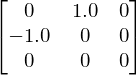

In [54]:
s1,s2,s2 = symbols('S_1 S_2 S_3')
s1 = Matrix([[0,0,0],[0,0,-1j],[0,1j,0]])
s2 = Matrix([[0,0,1j],[0,0,0],[-1j,0,0]])
s3 = Matrix([[0,-1j,0],[1j,0,0],[0,0,0]])
comm(s1,s2)

Com o código acima, pode-se verificar que as constantes de estrutura para esses geradores são dadas como segue:
\begin{equation}
[S_{j},S_{k}]=i\epsilon_{jkl}S_{l}.
\end{equation}

### Relação de comutação para as componentes do mometo angular
Em MQ, na base de posição, o momento angular é
\begin{equation}
\vec{L}=\vec{r}\mathrm{x}\vec{p} \text{ com } \vec{p}=-i\hbar\vec{\nabla}_{\vec{r}}.
\end{equation}
Podemos escrever as componentes do memento angular em termos dos geradores $S_{j}$:
\begin{align}
L_{1} & =  (\vec{r}\mathrm{x}\vec{p})_{1} = \sum_{k,l}\epsilon_{1kl}r_{k}p_{l}=\hbar(-ir_{2}\partial_{3}+ir_{3}\partial_{2}) \\
& = \hbar\begin{bmatrix}r_{1}&r_{2}&r_{3}\end{bmatrix}\begin{bmatrix} 0&0&0 \\ 0&0&-i \\ 0&i&0 \end{bmatrix}\begin{bmatrix}\partial_{1}\\\partial_{2}\\\partial_{3}\end{bmatrix} \\
& = \hbar\vec{r}^{T}S_{1}\vec{\nabla}.
\end{align}
Pode-se verificar, da mesma forma, que (__exercício__):
\begin{equation}
L_{j}=\hbar\vec{r}^{T}S_{j}\vec{\nabla}_{\vec{r}} \text{ para }j=2,3.
\end{equation}

Usando
\begin{align}
\vec{\nabla}_{\vec{r}}(\vec{r}^{T}) & = \begin{bmatrix} \partial_{1} \\ \partial_{2} \\ \partial_{3} \end{bmatrix}\begin{bmatrix} r_{1} & r_{2} & r_{3} \end{bmatrix} = \begin{bmatrix} \partial_{1}r_{1} & \partial_{1}r_{2} & \partial_{1}r_{3} \\ \partial_{2}r_{1} & \partial_{2}r_{2} & \partial_{2}r_{3} \\ \partial_{3}r_{1} & \partial_{3}r_{2} & \partial_{3}r_{3} \end{bmatrix} \\
& = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} = \mathbb{I}_{3}, 
\end{align}
obtemos as relações gerais de comutação entre as componentes do momento angular (em MQ):
\begin{align}
[L_{j},L_{k}] & = L_{j}L_{k}-L_{k}L_{j} = \hbar\vec{r}^{T}S_{j}\vec{\nabla}_{\vec{r}}\hbar\vec{r}^{T}S_{k}\vec{\nabla}_{\vec{r}} - \hbar\vec{r}^{T}S_{k}\vec{\nabla}\hbar\vec{r}^{T}S_{j}\vec{\nabla}_{\vec{r}} \\
& = \hbar^{2}\vec{r}^{T}S_{j}(\vec{\nabla}_{\vec{r}}\vec{r}^{T})S_{k}\vec{\nabla}_{\vec{r}} - \hbar^{2}\vec{r}^{T}S_{k}(\vec{\nabla}\vec{r}^{T})S_{j}\vec{\nabla}_{\vec{r}} \\
& = \hbar^{2}\vec{r}^{T}S_{j}\mathbb{I}_{3}S_{k}\vec{\nabla}_{\vec{r}} - \hbar^{2}\vec{r}^{T}S_{k}\mathbb{I}_{3}S_{j}\vec{\nabla}_{\vec{r}} \\
& = \hbar^{2}\vec{r}^{T}(S_{j}S_{k}-S_{k}S_{j})\vec{\nabla}_{\vec{r}} = i\epsilon_{jkl}\hbar^{2}\vec{r}^{T}S_{l}\vec{\nabla}_{\vec{r}} \\
& = i\hbar\epsilon_{jkl}L_{l}.
\end{align}

### $\{L_{j}\}$ como geradores do grupo de Lie $SO(3)$
Considere uma rotação do vetor posição de uma partícula em $\mathbb{R}^{3}$:
\begin{equation}
\vec{r}'=R\vec{r}.
\end{equation}
A transformação equivalente no espaço das funções de onda (funções escalares) pode ser esrita como
\begin{equation}
R(\psi(\vec{r})):=\psi(\vec{r}').
\end{equation}
Para uma rotação infinitesimal em torno de $z$:
\begin{equation}
R_{3}(\delta\phi)\psi(\vec{r}) = \psi(R_{3}(\delta\phi)\vec{r}) = \psi(\vec{r}').
\end{equation}
Agora,
\begin{equation}
\vec{r}' \approx (\mathbb{I}+i\delta\phi S_{3})\vec{r}=\vec{r}+i\delta\phi\begin{bmatrix} 0&-i&0 \\  i&0&0 \\ 0&0&0 \end{bmatrix}\begin{bmatrix}r_{1}\\r_{2}\\r_{3}\end{bmatrix} = \begin{bmatrix}r_{1}+\delta\phi r_{2}\\r_{2}-\delta\phi r_{1}\\r_{3}\end{bmatrix}.
\end{equation}

Assim, usando expansão em série de Taylor,
\begin{align}
R_{3}(\delta\phi)\psi(r_{1},r_{2},r_{3}) & = \psi(r_{1}+\delta\phi r_{2},r_{2}-\delta\phi r_{1},r_{3}) \\
& = \psi(r_{1},r_{2},r_{3}) + \delta\phi r_{2} \partial_{1}\psi(r_{1},r_{2},r_{3}) - \delta\phi r_{1}\partial_{2}\psi(r_{1},r_{2},r_{3}) \\
& = \psi(r_{1},r_{2},r_{3}) - (i/\hbar)\delta\phi(i\hbar r_{2} \partial_{1} - i\hbar r_{1}\partial_{2})\psi(r_{1},r_{2},r_{3}) \\
& = \psi(r_{1},r_{2},r_{3}) - (i/\hbar)\delta\phi L_{3}\psi(r_{1},r_{2},r_{3}).
\end{align}
Ou seja,
\begin{equation}
R_{3}(\delta\phi)\psi=\psi-i\delta\phi(L_{3}/\hbar)\psi.
\end{equation}
Seguindo, trocamos $\psi$ por $R_{3}(\phi)\psi$:
\begin{align}
& R_{3}(\delta\phi)R_{3}(\phi)\psi-R_{3}(\phi)\psi=-i\delta\phi(L_{3}/\hbar)R_{3}(\phi)\psi \\
& \therefore R_{3}(\phi+\delta\phi)\psi-R_{3}(\phi)\psi=-i\delta\phi(L_{3}/\hbar)R_{3}(\phi)\psi \\
& \therefore \frac{R_{3}(\phi+\delta\phi)-R_{3}(\phi)}{\delta\phi}=\frac{dR_{3}(\phi)}{d\phi}=-i(L_{3}/\hbar)R_{3}(\phi) \\
& \therefore R_{3}(\phi) = e^{-iL_{3}\phi/\hbar}.
\end{align}

__Exercício:__ Faça a verificação análoga para $R_{1}$ e $R_{2}$.

## Geradores e quebra de degenerescência
Consideremos a equação característica para o Hamiltoniano de algum sistema físico:
\begin{equation}
H|E\rangle=E|E\rangle.
\end{equation}
Vamos supor que $H$ é invariante por transformações de similaridade através dos elementos $R$ de um certo grupo $G$:
\begin{equation}
RHR^{-1}=H\therefore RH=HR \therefore [H,R]=\mathbb{0}.
\end{equation}
Agora, aplicamos $R$ na equação de autovalores e autovetores
\begin{equation}
RH|E\rangle=RE|E\rangle\Rightarrow H(R|E\rangle)=E(R|E\rangle).
\end{equation}
Ou seja, se $H$ comuta com os elementos $R\in G$, então $R|E\rangle$ também são autovetores de $H$ correspondentes ao mesmo autovalor $E$. Por isso dizemos que os autovetores $R|E\rangle$ são degenerados.

Consideremos agora que $G$ é um grupo de Lie, i.e., $R=e^{i\epsilon S}$. Se usarmos a fórmula de Baker-Campbell-Hausdorff,
\begin{align}
H & = RHR^{-1} = e^{i\epsilon S}He^{-i\epsilon S} \\
& = H + i\epsilon[S,H] - \epsilon^{2}[S,[S,H]] + \cdots,
\end{align}
vemos que, como $\epsilon\rightarrow0$, devemos ter
\begin{equation}
[S,H]=\mathbb{0}.
\end{equation}
Ou seja, se $H$ é invariante sob a ação dos elementos de um grupo de Lie, então $H$ comuta com os geradores desse grupo, e vice-versa. E isso implica que $H$ e $S$ possuem a mesma base de autovetores. Com isso, podemos quebrar a degenerescência (identificar diferentes autovetores) de $H$ através dos autovalores de $S$.

## Álgebra de Pauli
Matrizes de Pauli:

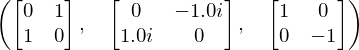

In [10]:
#s1, s2, s3 = symbols("sigma_1 sigma_2 sigma_3")
pauli(1),pauli(2),pauli(3)

In [8]:
tr(pauli(1)),tr(pauli(2)),tr(pauli(3))

Essas matrizes são Hermitianas e tem traço nulo, tal como os geradores de um grupo unitário. A relação de comutação entre elas é $[\sigma_{j},\sigma_{k}] = 2i\epsilon_{jkl}\sigma_{l}$. Portanto as constante de estrutura da álgebra de Lie correspondente são $c_{j,k}^{l}=2i\epsilon_{jkl}$. 

Qualquer matriz pode ser decomposta em termos da identidade e das matrizes de Pauli
\begin{equation}
A=\sum_{j=0}^{3}S_{j}\sigma_{j}/\sqrt{2},
\end{equation}
com $S_{j} = \langle \sigma_{j}/\sqrt{2}|A\rangle_{hs}=Tr(\sigma_{j}A)/\sqrt{2}$.

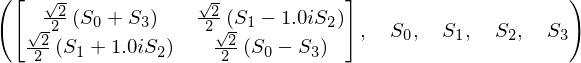

In [25]:
a, b, c, d, S0, S1, S2, S3 = symbols("a b c d S_0 S_1 S_2 S_3")
Ad = (S0*pauli(0) + S1*pauli(1) + S2*pauli(2) + S3*pauli(3))/sqrt(2)
Ad, simplify(tr(pauli(0)*Ad)/sqrt(2)), simplify(tr(pauli(1)*Ad)/sqrt(2)), simplify(tr(pauli(2)*Ad)/sqrt(2)), simplify(tr(pauli(3)*Ad)/sqrt(2))

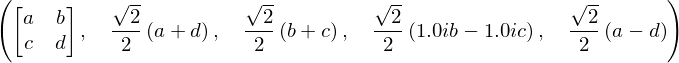

In [26]:
A = Matrix([[a,b],[c,d]])
A, tr(pauli(0)*A)/sqrt(2), tr(pauli(1)*A)/sqrt(2), tr(pauli(2)*A)/sqrt(2), tr(pauli(3)*A)/sqrt(2)

## Matrizes de Dirac
Essas matrizes são escritas como segue:
\begin{align}
& \gamma^{0} = \sigma_{3}\otimes\sigma_{0}=\begin{bmatrix}\sigma_{0}&\mathbb{O} \\\mathbb{O}&-\sigma_{0}\end{bmatrix} \text{, } \gamma^{1} = -i\sigma_{2}\otimes\sigma_{1}=\begin{bmatrix}\mathbb{O}&\sigma_{1} \\-\sigma_{1}&\mathbb{O}\end{bmatrix}, \\
& \gamma^{2} = -i\sigma_{2}\otimes\sigma_{2}=\begin{bmatrix}\mathbb{O}&\sigma_{2} \\-\sigma_{2}&\mathbb{O}\end{bmatrix} \text{, } \gamma^{3} = -i\sigma_{2}\otimes\sigma_{3}=\begin{bmatrix}\mathbb{O}&\sigma_{3} \\-\sigma_{3}&\mathbb{O}\end{bmatrix}.
\end{align}

In [36]:
def dirac(j):
    if j == 0:
        return tp(pauli(3),pauli(0)) # g0
    elif j == 1:
        return tp(-1j*pauli(2),pauli(1)) # g1
    elif j == 2:
        return tp(-1j*pauli(2),pauli(2)) # g2
    elif j == 3:
        return tp(-1j*pauli(2),pauli(3)) # g3

g0 g1 g2 g3


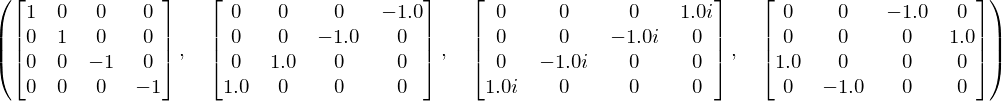

In [56]:
g0, g1, g2, g3 = symbols("gamma^1 gamma^2 gamma^3 gamma^4")
print("g0 g1 g2 g3")
dirac(0), dirac(1), dirac(2),dirac(3)

### Álgebra de Clifford

Uma base para matrizes $4\mathrm{x}4$ (tem 16 elementos):
\begin{align}
\left\{\mathbb{I}_{4} \text{, } \gamma^{\mu=0,1,2,3} \text{, } \gamma^{4}=i\gamma^{0}\gamma^{1}\gamma^{2}\gamma^{3}=\begin{bmatrix}  \mathbb{O} & \sigma_{0} \\ \sigma_{0} & \mathbb{O} \end{bmatrix} \text{, } \gamma^{4}\gamma^{\mu=0,1,2,3} \text{, } \sigma^{\mu\nu}=i[\gamma^{\mu},\gamma^{\nu}]/2 \text{ com }0\le\mu\le\nu\le3 \right\}.
\end{align}
Abaixo verificamos que essas matrizes são Hermitianas e tem traço nulo, com exceção da primeira que tem traço igual a 4.

In [73]:
def sig(mu,nu):
    return 1j*comm(dirac(mu),dirac(nu))/2

I4 g0 g1 g2 g3 g4  g4*g0 g4*g1 g4*g2 g4*g3 s01 s02 s03 s12 s13 s23 


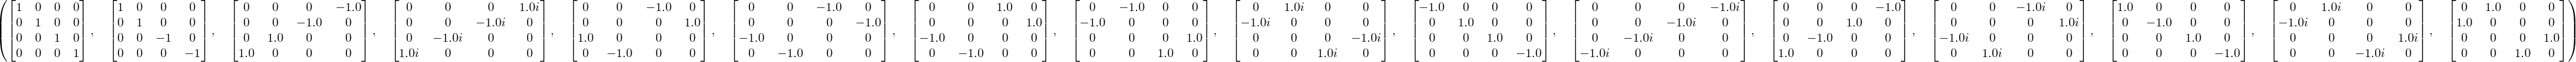

In [76]:
g0 = dirac(0); g1 = dirac(1); g2 = dirac(2); g3 = dirac(3)
g4 = 1j*g0*g1*g2*g3;
print("I4 g0 g1 g2 g3 g4  g4*g0 g4*g1 g4*g2 g4*g3 s01 s02 s03 s12 s13 s23 ")
id(4),g0,g1,g2,g3,g4,g4*g0,g4*g1,g4*g2,g4*g3,sig(0,1),sig(0,2),sig(0,3),sig(1,2),sig(1,3),sig(2,3)

In [77]:
tr(g0),tr(g1),tr(g2),tr(g3),tr(g4),tr(g4*g0),tr(g4*g1),tr(g4*g2),tr(g4*g3),tr(sig(0,1)),tr(sig(0,2)),tr(sig(0,3)),tr(sig(1,2)),tr(sig(1,3)),tr(sig(2,3))

## Matrizes de Gell-Mann generalizadas
\begin{align}
& \Gamma_{j}^{d} = \sqrt{\frac{2}{j(j+1)}}\sum_{k=1}^{j+1}(-1)^{\delta_{k,j+1}}|k\rangle\langle k|\text{, } j=1,\cdots,d-1, \\
& \Gamma_{k,l}^{s} = |k\rangle\langle l|+|l\rangle\langle k|\text{, }1\le k<l\le d, \\
& \Gamma_{k,l}^{a} = -i(|k\rangle\langle l|-|l\rangle\langle k|)\text{, }1\le k<l\le d.
\end{align}
OBS. Os dois últimos grupos de matrizes possuem $d(d-1)/2$ elementos cada. 

Pode-se verificar que para essas matrizes:
\begin{align}
& \mathrm{Tr}(\Gamma_{g}) = 0, \\
& \Gamma_{g}=\Gamma_{g}^{\dagger}, \\
& \mathrm{Tr}(\Gamma_{g}\Gamma_{g'}) = 2\delta_{gg'}.
\end{align}

Base ortonormal a partir das matrizes de Gell-Mann generalizadas:
\begin{equation}
\left\{\frac{\Gamma_{0}}{\sqrt{d}},\frac{\Gamma_{j}^{d}}{\sqrt{2}},\frac{\Gamma_{k,l}^{s}}{\sqrt{2}},\frac{\Gamma_{k,l}^{a}}{\sqrt{2}}\right\},
\end{equation}
com $1\le j < d-1$ e $1\le k<l\le d$.

In [45]:
def gell_mann(d,g,j,k):
    "Retorna as matrizes de Gell-Mann generalizadas"
    "d = dimensão, g = 'i', 'd', 's', 'a' refere-se ao subconjunto:"
    "'i'= identidade, 'd' = diagonal, 's' = simétrico, 'a' = antisimétrico"
    gm = zeros(d,d)
    if g == 'i':  # identity
        for j in range(0,d):
            gm[j,j] = 1
    elif g == 'd':  # diagonal
        nt = sqrt(2/(j*(j+1)))
        for m in range(0,j):
            gm[m,m] = nt
        gm[j,j] = -j*nt
    elif g == 's':  # symmetric
        gm[j-1,k-1] = 1;  gm[k-1,j-1] = 1
    elif g == 'a':  # anti-symmetric
        gm[j-1,k-1] = -1j;  gm[k-1,j-1] = 1j
    return gm

### Matrizes de Pauli

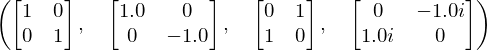

In [47]:
gell_mann(2,'i',1,1), gell_mann(2,'d',1,1), gell_mann(2,'s',1,2), gell_mann(2,'a',1,2)

### Matrizes de Gell-Mann

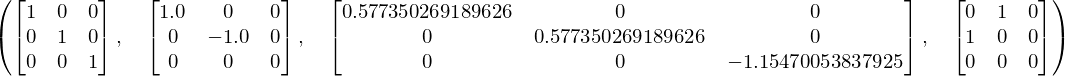

In [61]:
gell_mann(3,'i',1,1), gell_mann(3,'d',1,1), gell_mann(3,'d',2,2),gell_mann(3,'s',1,2)

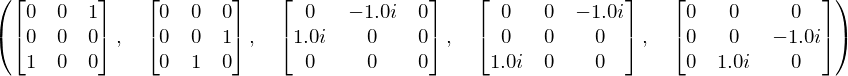

In [62]:
gell_mann(3,'s',1,3),gell_mann(3,'s',2,3), gell_mann(3,'a',1,2), gell_mann(3,'a',1,3), gell_mann(3,'a',2,3)

### Base alternativa à base de Dirac para $d=4$

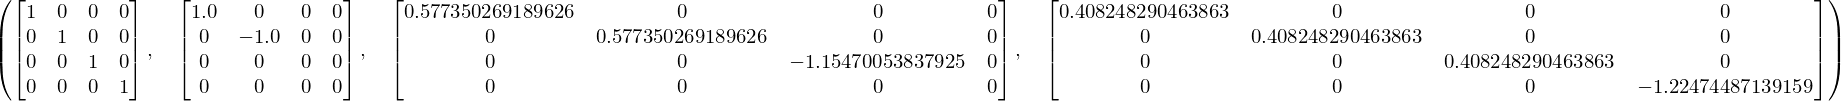

In [64]:
gell_mann(4,'i',1,1), gell_mann(4,'d',1,1), gell_mann(4,'d',2,2), gell_mann(4,'d',3,3)

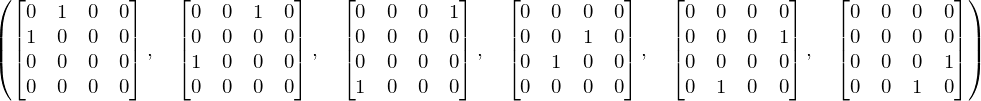

In [66]:
gell_mann(4,'s',1,2),gell_mann(4,'s',1,3),gell_mann(4,'s',1,4),gell_mann(4,'s',2,3),gell_mann(4,'s',2,4),gell_mann(4,'s',3,4)

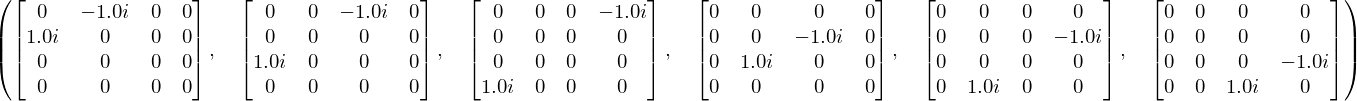

In [67]:
gell_mann(4,'a',1,2),gell_mann(4,'a',1,3),gell_mann(4,'a',1,4),gell_mann(4,'a',2,3),gell_mann(4,'a',2,4),gell_mann(4,'a',3,4)